In [139]:
# import packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import seaborn as sns
sns.set()

In [140]:
# import transaction data
transactions = pd.read_csv('electronidexlabeled.csv', header=None)
transactions.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item,...,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item
1,Acer Aspire,Brother Printer Toner,Belkin Mouse Pad,VGA Monitor Cable,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dell Desktop,Lenovo Desktop Computer,Apple Wireless Keyboard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iMac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acer Desktop,Lenovo Desktop Computer,Intel Desktop,XIBERIA Gaming Headset,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# import category data
cats = pd.read_csv('electronidexcategories.csv')
cats.head()

,Item,Category
0,Belkin Mouse Pad,Accessories
1,Computer Game,Accessories
2,Large Mouse Pad,Accessories
3,Microsoft Office Home and Student 2016,Accessories
4,APIE Bluetooth Headphones,Active Headphones


In [142]:
# drop transaction header row
transactions = transactions.rename(columns=transactions.iloc[0], copy=False).iloc[1:].reset_index(drop=True)
transactions.head()

,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item,...,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item
0,Acer Aspire,Brother Printer Toner,Belkin Mouse Pad,VGA Monitor Cable,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dell Desktop,Lenovo Desktop Computer,Apple Wireless Keyboard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iMac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acer Desktop,Lenovo Desktop Computer,Intel Desktop,XIBERIA Gaming Headset,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HP Laptop,iMac,Epson Black Ink,ASUS Desktop,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


######################################

EDA

In [193]:
# create dataset to show total sales volume of each product
volumeSold = pd.value_counts(transactions.values.flatten())
volumeSold = volumeSold.to_frame()
volumeSold.columns = ['Volume']
volumeSold['%TTL'] = round((volumeSold['Volume']/volumeSold['Volume'].sum())*100,1)
volumeSold.head(25)

,Volume,%TTL
iMac,2524,5.8
HP Laptop,1913,4.4
CYBERPOWER Gamer Desktop,1809,4.2
Apple Earpods,1715,4.0
Apple MacBook Air,1556,3.6
Lenovo Desktop Computer,1478,3.4
Dell Desktop,1365,3.2
ViewSonic Monitor,1089,2.5
Apple MacBook Pro,1087,2.5
Acer Desktop,1023,2.4


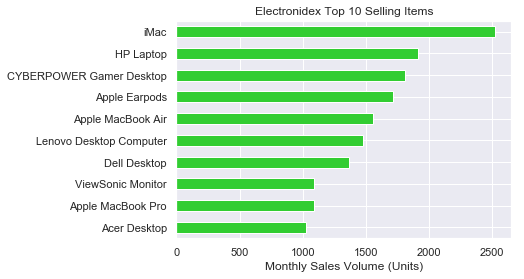

In [184]:
# build bar chart to display top selling items
volumeSold[:10].plot(kind='barh',legend=False, color='limegreen', figsize=(6, 4))
plt.title('Electronidex Top 10 Selling Items')
plt.xlabel('Monthly Sales Volume (Units)')
plt.gca().invert_yaxis()

Computers represent 9 out of the top 10 selling products at Electronidex (5 desktops, 3 laptops, and 1
monitor). The top-selling item is the iMac, which is responsible for 6% of the company’s
monthly sales volume, followed by the HP Laptop and the Cyberpower Gamer Desktop.

In [161]:
# create dataframe with category names
# convert category data to dictionary
catdata = cats.set_index('Item')['Category'].to_dict()
# replace product names with catogories
transactions_cat = transactions.replace({"Item": catdata})
transactions_cat.head()

,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item,...,Item,Item,Item,Item,Item,Item,Item,Item,Item,Item
0,Laptop,Printer Ink,Accessories,Computer Cords,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Desktop,Desktop,Keyboard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Desktop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Desktop,Desktop,Desktop,Computer Headphones,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laptop,Desktop,Printer Ink,Desktop,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# create dataset to show total sales volume of each product category
volumeSold_cat = pd.value_counts(transactions_cat.values.flatten())
volumeSold_cat = volumeSold_cat.to_frame()
volumeSold_cat.columns = ['Volume']
volumeSold_cat['%TTL'] = round((volumeSold_cat['Volume']/volumeSold_cat['Volume'].sum())*100,1)
volumeSold_cat

,Volume,%TTL
Desktop,9553,22.0
Laptop,7564,17.5
Monitor,5597,12.9
Computer Mice,3315,7.7
Keyboard,2919,6.7
Active Headphones,2483,5.7
Mouse and Keyboard Combo,2075,4.8
Accessories,1736,4.0
Speakers,1443,3.3
Printers,1254,2.9


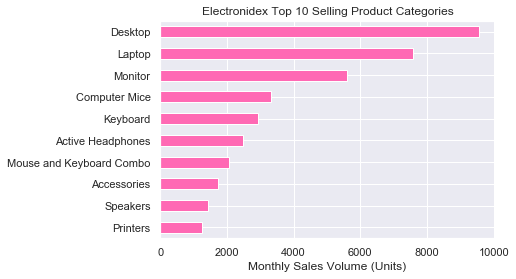

In [183]:
# build bar chart to display top selling product categories
volumeSold_cat[:10].plot(kind='barh',legend=False, color='hotpink', figsize=(6, 4))
plt.title('Electronidex Top 10 Selling Product Categories')
plt.xlabel('Monthly Sales Volume (Units)')
plt.gca().invert_yaxis()

The biggest portion of Electronidex’s sales comes from computers - desktops, laptops, monitors,
and computer tablets. These four categories make up 55% of the company’s online sales, with
desktops and laptops accounting for 40%.

######################################

MARKET BASKET ANALYSIS

(PRODUCT LEVEL)

In [185]:
# make a list of transactions (product level)
transact_list = []
for sublist in transactions.values.tolist():
    clean_sublist = [item for item in sublist if item is not np.nan]
    transact_list.append(clean_sublist)
transact_list[0:5]

[['Acer Aspire',
  'Brother Printer Toner',
  'Belkin Mouse Pad',
  'VGA Monitor Cable'],
 ['Dell Desktop', 'Lenovo Desktop Computer', 'Apple Wireless Keyboard'],
 ['iMac'],
 ['Acer Desktop',
  'Lenovo Desktop Computer',
  'Intel Desktop',
  'XIBERIA Gaming Headset'],
 ['HP Laptop', 'iMac', 'Epson Black Ink', 'ASUS Desktop']]

In [186]:
# create dataset with dummy variables (true/false) for each product
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transact_list).transform(transact_list)
transact_dummy = pd.DataFrame(te_ary, columns=te.columns_)
transact_dummy = transact_dummy.drop([transact_dummy.columns[0]], axis='columns')
transact_dummy.head()

,1TB Portable External Hard Drive,2TB Portable External Hard Drive,3-Button Mouse,3TB Portable External Hard Drive,5TB Desktop Hard Drive,AOC Monitor,APIE Bluetooth Headphones,ASUS 2 Monitor,ASUS Chromebook,ASUS Desktop,...,USB Cable,VGA Monitor Cable,ViewSonic Monitor,Wireless Portable Mouse,XIBERIA Gaming Headset,Zombie Gaming Headset,iMac,iPad,iPad Pro,iPhone Charger Cable
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [187]:
# run apriori to see association rules, ranked by support
frequent_itemsets = apriori(transact_dummy, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('support', ascending = False, inplace = True)
rules = rules[(rules['confidence'] > 0.05) & (rules['lift'] > 1.3)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(iMac),(HP Laptop),0.256126,0.194103,0.075547,0.294958,1.519599,0.025832,1.143049
38,(HP Laptop),(iMac),0.194103,0.256126,0.075547,0.389209,1.519599,0.025832,1.217886
41,(iMac),(Lenovo Desktop Computer),0.256126,0.148043,0.058770,0.229456,1.549932,0.020852,1.105657
40,(Lenovo Desktop Computer),(iMac),0.148043,0.256126,0.058770,0.396978,1.549932,0.020852,1.233577
32,(Dell Desktop),(iMac),0.134011,0.256126,0.054601,0.407436,1.590762,0.020277,1.255347
33,(iMac),(Dell Desktop),0.256126,0.134011,0.054601,0.213180,1.590762,0.020277,1.100618
47,(iMac),(ViewSonic Monitor),0.256126,0.110320,0.049415,0.192934,1.748851,0.021159,1.102363
46,(ViewSonic Monitor),(iMac),0.110320,0.256126,0.049415,0.447926,1.748851,0.021159,1.347418
36,(HP Laptop),(ViewSonic Monitor),0.194103,0.110320,0.047992,0.247250,2.241200,0.026578,1.181906
37,(ViewSonic Monitor),(HP Laptop),0.110320,0.194103,0.047992,0.435023,2.241200,0.026578,1.426425


There is an interesting relationship between customers purchasing an iMac in
the same transaction that they also purchase one of the items below:

● HP Laptop

● Lenovo Desktop Computer

● Dell Desktop

● ViewSonic Monitor

Transactions that included at least one of the items listed above were 50-70% more likely to
include an iMac than other transactions.

(CATEGORY LEVEL)

In [195]:
# make a list of transactions (category level)
transact_list_cat = []
for sublist in transactions_cat.values.tolist():
    clean_sublist = [item for item in sublist if item is not np.nan]
    transact_list_cat.append(clean_sublist)
transact_list_cat[0:5]

[['Laptop', 'Printer Ink', 'Accessories', 'Computer Cords'],
 ['Desktop', 'Desktop', 'Keyboard'],
 ['Desktop'],
 ['Desktop', 'Desktop', 'Desktop', 'Computer Headphones'],
 ['Laptop', 'Desktop', 'Printer Ink', 'Desktop']]

In [196]:
# create dataset with dummy variables (true/false) for each product
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transact_list_cat).transform(transact_list_cat)
transact_dummy_cat = pd.DataFrame(te_ary, columns=te.columns_)
transact_dummy_cat = transact_dummy_cat.drop([transact_dummy_cat.columns[0]], axis='columns')
transact_dummy_cat.head()

,Accessories,Active Headphones,Computer Cords,Computer Headphones,Computer Mice,Computer Stands,Computer Tablets,Desktop,External Hard Drive,Keyboard,Laptop,Monitor,Mouse and Keyboard Combo,Printer Ink,Printers,Smart Home Devices,Speakers
0,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False


In [198]:
# run apriori to see association rules, ranked by support
frequent_itemsets = apriori(transact_dummy_cat, min_support=0.03, use_colnames=True)
rules_cat = association_rules(frequent_itemsets, metric="lift")
rules_cat.sort_values('support', ascending = False, inplace = True)
rules_cat = rules_cat[(rules_cat['confidence'] > 0.05) & (rules_cat['lift'] > 1.3)]
rules_cat

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
494,(Monitor),"(Laptop, Desktop)",0.393086,0.320793,0.182511,0.464304,1.447363,0.056412,1.267897
490,"(Laptop, Monitor)",(Desktop),0.240468,0.579969,0.182511,0.758985,1.308664,0.043047,1.742758
491,"(Laptop, Desktop)",(Monitor),0.320793,0.393086,0.182511,0.568938,1.447363,0.056412,1.407951
495,(Desktop),"(Laptop, Monitor)",0.579969,0.240468,0.182511,0.314691,1.308664,0.043047,1.108307
362,(Computer Mice),"(Laptop, Desktop)",0.274428,0.320793,0.122420,0.446091,1.390588,0.034385,1.226207
359,"(Laptop, Desktop)",(Computer Mice),0.320793,0.274428,0.122420,0.381616,1.390588,0.034385,1.173336
460,"(Laptop, Keyboard)",(Desktop),0.147331,0.579969,0.114692,0.778468,1.342257,0.029245,1.896026
464,(Keyboard),"(Laptop, Desktop)",0.255516,0.320793,0.114692,0.448866,1.399238,0.032725,1.232380
465,(Desktop),"(Laptop, Keyboard)",0.579969,0.147331,0.114692,0.197756,1.342257,0.029245,1.062855
461,"(Laptop, Desktop)",(Keyboard),0.320793,0.255516,0.114692,0.357528,1.399238,0.032725,1.158780


At the category level, there is an interesting pattern of Electronidex customers buying a monitor
and also buying an item from one of the following product categories (in the same transaction):

● Mouse & Keyboard Combo

● Accessories

● Printers

● Computer Tablets

● Computer Cords

Based on the sales data provided, customers who bought an item from one of the categories
above were 40-50% more likely to buy a monitor than other customers. In fact, 59% of the
transactions where a monitor was purchased also included an item from at least one of the
categories listed above.